In [1]:
## Set date of phenotype data to use
filedate = 'Dec172018'

In [2]:
## Bring in needed mods
import pandas as pd, numpy as np, EmpiricalBrownsMethod as ebm

In [7]:
## set path to file, should end in the words, 
## "curation_baselined_median21_AUC_Xstrain_pvalues.csv'
file_path = '../FILES/Tecan_qtlruns_%s_curated_baselined_median51_AUC_Xstrain_pvalues.csv'%(
    filedate)

In [8]:
## set path to phenotype data, should end with the words, 
## "curation_baselined_median21_AUC_Xstrain.csv'
data_path = '../FILES/Tecan_qtlruns_%s_curated_baselined_median51_AUC_Xstrain_noclone.csv'%(
    filedate)

In [9]:
## write ftn for transforming pvalues back to pvalues 
def back_to_pval(pvals):
    return 10**(-pvals)

In [10]:
## Bring in pvalue data
pvaldf = pd.read_csv(file_path,index_col=0)

In [11]:
## check shape of df
pvaldf.shape

(2777, 22)

In [12]:
## Examin the 5 rows, check order of phenotype/experiments
pvaldf.head()

,Oldix,Vcfix_v,Pos_v,Cumpos_v,Vcfix_w,Pos_w,Cum_pos_w,AF,is_ref,Chrom,...,30C_0.125,30C_0.175,37C_0.0,37C_0.075,37C_0.125,37C_0.175,38C_0.0,39C_0.0,39C_0.075,39C_0.125
0,289,289,5016,5016,1396,35290,35290,0.442308,0,Chr01,...,0.928990,0.655625,0.170498,0.081444,0.516895,0.060467,0.473662,0.078778,0.411585,0.095533
1,1398,1398,35512,35512,1426,36280,36280,0.432692,0,Chr01,...,1.346480,1.175954,0.024533,0.036685,0.402824,0.017388,0.626505,0.107700,0.406838,0.116869
2,1429,1429,36364,36364,1432,36427,36427,0.471154,0,Chr01,...,1.278148,1.169051,0.258632,0.225041,0.722480,0.174109,1.040709,0.221757,0.493944,0.113073
3,1438,1438,36573,36573,1440,36618,36618,0.451923,0,Chr01,...,1.597138,1.364218,0.372991,0.249305,0.756145,0.153419,1.317119,0.249305,0.495899,0.139460
4,1447,1447,36769,36769,1457,36882,36882,0.461538,0,Chr01,...,1.509965,1.337120,0.509959,0.479816,0.879405,0.243728,1.581987,0.446249,0.642629,0.276460


In [13]:
## Bring in phenotype data
phenodf = pd.read_csv(data_path,index_col=0)

In [14]:
## Sort by strain
phenodf.sort_values(by=['strain','temp','amphB'],inplace=True)

In [15]:
## Examine SS-A837
phenodf.loc['SS-A837']

,temp,amphB,median_AUC
strain,,,
SS-A837,30,0.000,72.846625
SS-A837,30,0.075,6.396750
SS-A837,30,0.125,1.581000
SS-A837,30,0.175,2.054625
SS-A837,37,0.000,60.492750
SS-A837,37,0.075,39.584125
SS-A837,37,0.125,8.383125
SS-A837,37,0.175,0.471125
SS-A837,38,0.000,49.261750


In [16]:
## Group data by temp and druc con
AUC =  pd.DataFrame([a[1].sort_values('strain')['median_AUC'].values 
                      for a \]
                    n phenodf.groupby(['temp','amphB'])]).values

In [17]:
## Check length of the phenotypes
assert len(AUC) == phenodf[['temp','amphB']].drop_duplicates().shape[0]

In [18]:
## Check length of the first phenotype
assert len(AUC[0]) == len(phenodf.index.unique())

In [19]:
## gather phenotypes
phenos = ['C_'.join([str(s) for s in a[0]]) 
          for a in phenodf.groupby(['temp','amphB'])]

In [20]:
## transforme pvalues
pval_trans = pvaldf[phenos].apply(back_to_pval)

In [21]:
## Check shape
pval_trans.shape

(2777, 12)

In [22]:
## Examine 1st 5 rows. 
pval_trans.head()

,30C_0.0,30C_0.075,30C_0.125,30C_0.175,37C_0.0,37C_0.075,37C_0.125,37C_0.175,38C_0.0,39C_0.0,39C_0.075,39C_0.125
0,0.030284,0.329466,0.117763,0.220991,0.675308,0.829002,0.304162,0.870028,0.335999,0.834107,0.387628,0.802541
1,0.094969,0.356629,0.045032,0.066688,0.945078,0.919000,0.395527,0.960755,0.236317,0.780369,0.391888,0.764066
2,0.258545,0.336791,0.052705,0.067756,0.551275,0.595605,0.189461,0.669716,0.091052,0.600126,0.320669,0.770774
3,0.435092,0.235836,0.025285,0.043230,0.423651,0.563242,0.175330,0.702395,0.048182,0.563242,0.319228,0.725337
4,0.473216,0.225201,0.030905,0.046013,0.309059,0.331272,0.132006,0.570521,0.026183,0.357891,0.227704,0.529103


In [23]:
## Check work 
assert pval_trans.shape[1] == len(phenos)

In [24]:
## Combine the pvalues via ebm
combined_p_ebm = [ebm.EmpiricalBrownsMethod(AUC,pval.values) 
                  for index, pval in pval_trans.iterrows()]

In [25]:
## Append as a new column to pvalue dataframe
pvaldf['EBM'] = -np.log10(combined_p_ebm)

In [26]:
## Save dataframe
pvaldf.to_csv('../FILES/'+file_path.split('/')[
    -1].split('.csv')[0]+'_combined.csv')

In [36]:
'../FILES/'+file_path.split('/')[
    -1].split('.csv')[0]+'_combined.csv'

'../FILES/Tecan_qtlruns_Dec172018_curated_baselined_median51_AUC_Xstrain_pvalues_combined.csv'

In [27]:
## Investigate for PM, "Why are the pvalues from combined EBM not larger?"
chrom2_cpval =  [ebm.EmpiricalBrownsMethod(AUC,pval.values,extra_info=True) 
                  for index, pval in 
                 pval_trans[(pvaldf.Chrom=='Chr02')].iterrows()]

In [28]:
## Bring in mod for ploting
from matplotlib import pyplot as plt
%matplotlib inline

In [29]:
## Set color theme
plt.style.use(['dark_background',
               'tableau-colorblind10'])

In [30]:
## Gather chromosome 2 position
chr2_pos = pvaldf[(pvaldf.Chrom=='Chr02')]['Pos_v'].values

In [31]:
## Get fishers combined pval and log transfrom
Fishers_combined_p_chr2 = np.array([-np.log10(cp[1]) for cp in chrom2_cpval])

In [32]:
## Get the EBM " ... "
EBM_combined_p_chr2 = np.array([-np.log10(cp[0]) for cp in chrom2_cpval])

In [33]:
## How many bases are in a kilobase?
kb = 1000.0

In [34]:
## Write path for saving figure
figsave = '../FIGURES'+file_path.split('FILES')[
    -1].split('.csv')[0]+'_Fisher_vs_EBM.png'

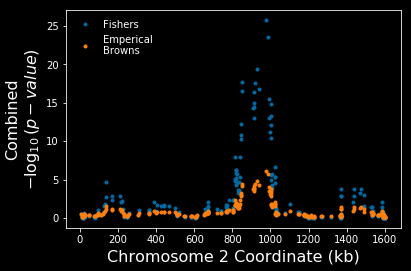

In [35]:
## Plot fishers vs E.B.M. combined p-values
plt.plot(chr2_pos/kb, 
         Fishers_combined_p_chr2,'.',
         label='Fishers');
plt.plot(chr2_pos/kb,
         EBM_combined_p_chr2,'.',
         label='Emperical\nBrowns');
leg = plt.legend(loc='upper left');
leg.get_frame().set_linewidth(0.0);
plt.xlabel('Chromosome 2 Coordinate (kb)',
           fontsize =16);
plt.ylabel('Combined\n$-\log_{10}\,(p-value)$',
           fontsize=16);
if figsave is not None:
    plt.savefig(figsave,
                dpi=100,bbox_inches='tight')